In [1]:
# Gráfica la precipitación y calcula
# un índice básico de onset de acuerdo
# con (Higgins et al, 1999).

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
# Datos.
path_d = "../results/onset/"
fname = ["pre_daily.csv",
    "pre_daily_may-jun.csv"]
df = pd.read_csv(path_d + fname[0],
    index_col = "time")

# Estabelcemos el formato datetime para
# manipular la fecha fácilmente.
df.index = pd.to_datetime(df.index)

df.head()

,precip,percentage,precip_15,percentage_15,precip_5,percentage_5
time,,,,,,
1981-01-01,0.000000,0.000000,NaN,NaN,NaN,NaN
1981-01-02,0.002803,0.001754,NaN,NaN,NaN,NaN
1981-01-03,0.000000,0.000000,NaN,NaN,0.000561,0.000351
1981-01-04,0.000000,0.000000,NaN,NaN,0.204076,0.074737
1981-01-05,0.000000,0.000000,NaN,NaN,0.206587,0.075088


In [3]:
# Crea un índice de onset de acuerdo con
# el umbral para tres días seguidos de
# cumplimiento con el criterio.
umbral = [2, 0.33]
name = ["precip", "percentage"]

cols = ["", "_5", "_15"]
for u, n in enumerate(name):
    for c in cols:
        # Nombre de las columnas dummy.
        proc = [n + c]
        for i in range(0,3):
            proc.append(n + c +
                "_" + str(i)) 

        # Traslapa los últimos 3 días 
        # y da un valor de 1 a cada día 
        # que cumpla con el umbral.
        for i, p in enumerate(proc[1:]):
            df[p] = df[proc[0]].shift(i)
            df[p].clip( upper = umbral[u],
                inplace = True )
            df[p] = df[p].where(
                df[p] == umbral[u], 0)
            df[p] = df[p].where(
                df[p] < umbral[u], 1)

        # El índice es uno si los tres
        # cumplen con el umbral.
        ind = "Index_" + n + c
        df[ind] = ( df[proc[1]] +
            df[proc[2]] + df[proc[3]] )
        df[ind] = df[ind].where(df[ind] == 3, 0)
        df[ind] = df[ind].where(df[ind] < 3, 1)
        df.drop(proc[1:],
            axis = 1, inplace = True)

In [5]:
# Datos de abril a noviembre.
df_m = df[df.index.month.isin(
    range(4, 12) ) ]

df_m.head()

,precip,percentage,precip_15,percentage_15,precip_5,percentage_5,Index_precip,Index_precip_5,Index_precip_15,Index_percentage,Index_percentage_5,Index_percentage_15
time,,,,,,,,,,,,
1981-04-01,0.000000,0.000000,0.040408,0.010058,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-02,0.000000,0.000000,0.042619,0.010526,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-03,0.000000,0.000000,0.042619,0.010526,0.005417,0.001404,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-04,0.000000,0.000000,0.142869,0.026082,0.005417,0.001404,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-05,0.027086,0.007018,0.513662,0.068070,0.005417,0.001404,0.0,0.0,0.0,0.0,0.0,0.0


(0.0, 7.864361773580313)

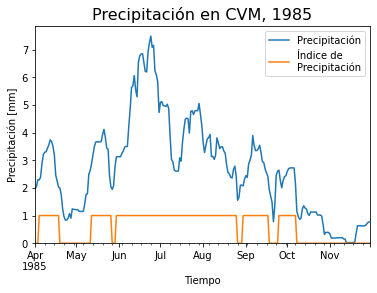

In [8]:
# Año a graficar.
year = 1985
# 0: diario, 1: pentada, 2: 15 días.
k = 2

# Escogemos el año en cuestión.
df_my = df_m[df_m.index.year == year]

# Graficamos.
fig, ax = plt.subplots()
df_my[df.columns[k]].plot(ax = ax)
df_my[df.columns[k + 6]].plot(ax = ax)
#df_my[df.columns[k + 9]].plot(ax = ax)

ax.set_title("Precipitación en CVM,"
    f" {year}", fontsize = 16)
ax.set_xlabel("Tiempo")
ax.set_ylabel("Precipitación [mm]")
ax.legend(["Precipitación",
    "Índice de\nPrecipitación",
    #"Índice de\nceldas"
    ])
ax.set_ylim(0)